<a href="https://colab.research.google.com/github/vrindaBindal2712/Diabetes-Prediction-using-Machine-Learning-with-Python-/blob/main/Project_3_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
pd.read_csv?

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Making a Predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


In [46]:
# ---- Required Libraries ----
import numpy as np
import joblib
from google.colab import widgets
from IPython.display import display, clear_output



# ---- Diabetes Prediction Function ----
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    input_data = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]])
    input_data_std = scaler.transform(input_data)
    prediction = classifier.predict(input_data_std)

    # Clear previous output
    clear_output()
    print("\n--- 🩺 Diabetes Prediction Result ---")

    if prediction[0] == 0:
        print("✅ The person is **NOT diabetic**. Keep maintaining a healthy lifestyle! 💪")
        print("\n🔹 **Health Tips:**")
        print("- ✅ Continue regular exercise 🏃‍♂️")
        print("- ✅ Maintain a balanced diet 🥗")
        print("- ✅ Regular check-ups with the doctor 👨‍⚕️")
    else:
        print("⚠️ The person is **DIABETIC**. Consider consulting a doctor! 🚑")
        print("\n🔸 **Health Recommendations:**")
        print("- 🔴 Monitor blood sugar levels regularly 📊")
        print("- 🥗 Adopt a diabetes-friendly diet 🍎")
        print("- 🚴 Engage in moderate physical activities")
        print("- 👨‍⚕️ Consult a healthcare provider")

    # Generate and display additional health tips
    health_tips = get_health_tips(input_data[0], prediction[0])
    print("\n--- 📌 Additional Health Tips ---")
    for tip in health_tips:
        print("✔️", tip)

# ---- Health Tips Function ----
def get_health_tips(input_data, prediction):
    glucose, bp, bmi = input_data[1], input_data[2], input_data[5]
    tips = []

    if prediction == 1:  # Diabetic
        tips.append("⚠️ You are diabetic. Consider consulting a doctor.")
        tips.append("🥦 Follow a low-carb, high-fiber diet.")
        tips.append("🏃 Engage in regular physical activity (30 mins/day).")
        tips.append("🩸 Monitor your blood sugar levels regularly.")

    else:  # Not Diabetic
        tips.append("✅ You are not diabetic! Maintain a healthy lifestyle.")

        # Check for high glucose
        if glucose > 140:
            tips.append("⚠️ High glucose detected! Reduce sugar intake.")

        # Check for high blood pressure
        if bp > 80:
            tips.append("⚠️ High BP! Avoid too much salt and processed foods.")

        # Check for high BMI
        if bmi > 25:
            tips.append("⚠️ High BMI! Exercise and maintain a balanced diet.")

    return tips

# ---- Interactive Input Form (Google Colab) ----
form = widgets.TabBar(["🔹 Enter Your Health Data"])
with form.output_to(0):
    Pregnancies = int(input("Enter number of Pregnancies: "))
    Glucose = float(input("Enter Glucose Level (mg/dL): "))
    BloodPressure = float(input("Enter Blood Pressure (mm Hg): "))
    SkinThickness = float(input("Enter Skin Thickness (mm): "))
    Insulin = float(input("Enter Insulin Level (µU/mL): "))
    BMI = float(input("Enter BMI: "))
    DiabetesPedigreeFunction = float(input("Enter Diabetes Pedigree Function: "))
    Age = int(input("Enter Age: "))

    # Make Prediction
    predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age)



--- 🩺 Diabetes Prediction Result ---
✅ The person is **NOT diabetic**. Keep maintaining a healthy lifestyle! 💪

🔹 **Health Tips:**
- ✅ Continue regular exercise 🏃‍♂️
- ✅ Maintain a balanced diet 🥗
- ✅ Regular check-ups with the doctor 👨‍⚕️

--- 📌 Additional Health Tips ---
✔️ ✅ You are not diabetic! Maintain a healthy lifestyle.


<IPython.core.display.Javascript object>


🔮 **Welcome to the Diabetes Risk Simulator!** 🔮
👤 **Starting Health Stats:** {'age': 39, 'glucose': 149, 'bmi': 34.9, 'exercise': 'High', 'diet': 'Healthy', 'stress': 'Medium', 'sleep': 'Poor'}

📆 **Year 1 Simulation...**
📊 **Current Health Score:** 95%

📆 **Year 2 Simulation...**
📊 **Current Health Score:** 90%

📆 **Year 3 Simulation...**
📊 **Current Health Score:** 85%

📆 **Year 4 Simulation...**
📊 **Current Health Score:** 80%

📆 **Year 5 Simulation...**
📊 **Current Health Score:** 73%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


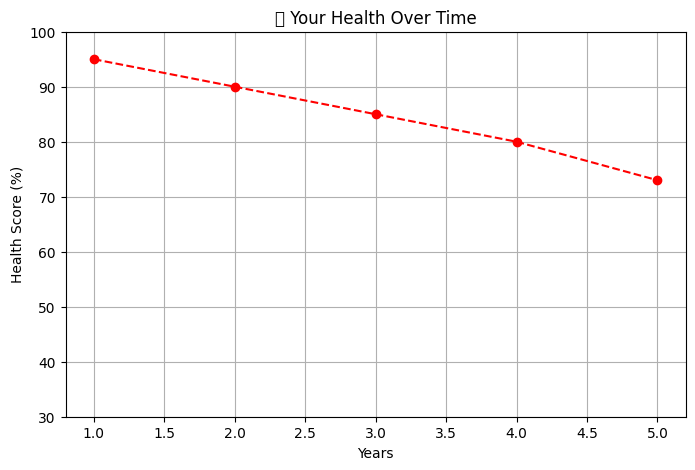


🔬 **Final Prediction**:
⚠️ Moderate Risk. Try improving your diet and exercise! 🍎🏃


In [47]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# ---- Simulated User Data ----
user = {
    "age": random.randint(20, 50),
    "glucose": random.randint(80, 160),
    "bmi": round(random.uniform(18, 35), 1),
    "exercise": random.choice(["Low", "Moderate", "High"]),
    "diet": random.choice(["Healthy", "Balanced", "Unhealthy"]),
    "stress": random.choice(["Low", "Medium", "High"]),
    "sleep": random.choice(["Poor", "Average", "Good"])
}

# ---- Simulation Function ----
def simulate_health():
    health_score = 100  # Everyone starts at 100%
    years = 5
    history = []

    print("\n🔮 **Welcome to the Diabetes Risk Simulator!** 🔮")
    print(f"👤 **Starting Health Stats:** {user}")

    for year in range(1, years + 1):
        print(f"\n📆 **Year {year} Simulation...**")
        time.sleep(1)

        # **Health Impact Based on Lifestyle Choices**
        if user["diet"] == "Unhealthy":
            health_score -= random.randint(5, 12)
        if user["exercise"] == "Low":
            health_score -= random.randint(5, 10)
        if user["sleep"] == "Poor":
            health_score -= random.randint(3, 8)
        if user["stress"] == "High":
            health_score -= random.randint(3, 7)

        # **Glucose & BMI Trends Over Time**
        user["glucose"] += random.randint(0, 10) if user["diet"] == "Unhealthy" else random.randint(-5, 5)
        user["bmi"] += round(random.uniform(-0.5, 0.5), 1)

        # **Track the Health History**
        history.append(health_score)

        # **Virtual Health Avatar Response**
        print(f"📊 **Current Health Score:** {health_score}%")
        if health_score < 70:
            print("⚠️ Your health is declining! Consider improving your diet & exercise.")
        if health_score < 50:
            print("🚨 High diabetes risk! You need immediate lifestyle changes.")

    # ---- Show Health Trend Over 5 Years ----
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, years + 1), history, marker="o", linestyle="--", color="red")
    plt.xlabel("Years")
    plt.ylabel("Health Score (%)")
    plt.title("📊 Your Health Over Time")
    plt.ylim(30, 100)
    plt.grid()
    plt.show()

    print("\n🔬 **Final Prediction**:")
    if health_score >= 80:
        print("✅ You're in great health! Keep up your habits. 💪")
    elif health_score >= 60:
        print("⚠️ Moderate Risk. Try improving your diet and exercise! 🍎🏃")
    else:
        print("🚨 High Risk! You should consult a doctor ASAP. 🏥")

# ---- Start Simulation ----
simulate_health()
